In [1]:
import pandas as pd

# Read the Excel file
file_path = "Data 4 décembre 2024.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(data.head())

# Describe the dataframe
print("\nDescription of the dataframe:")
print(data.describe())

# Display basic information about the dataframe
print("\nBasic information about the dataframe:")
print(data.info())

First few rows of the dataframe:
          ID                    Nom   Secteur  Année  Liquidité générale  \
0  906416441  Société ESDAACAS SARL       BTP   2023                6.49   
1  900216421  Société MOTIACAU SARL       BTP   2023                3.98   
2  905016401  Société INGCACAD SARL  Services   2023                1.21   
3  900306430  Société AINEACAE SARL   Energie   2023                0.31   
4  906406440  Société ASTEACAM SARL       BTP   2023                1.34   

   Liquidité immédiate  Endettement  Var CA  RN/CA  Var Achats  \
0                 3.68         0.62  -0.469 -0.307      7.5001   
1                 1.49         0.32   2.003  0.017      1.9293   
2                 1.21         0.00   1.042  0.184      1.1168   
3                 0.13         0.00   0.948  0.005      0.9469   
4                 1.23         0.45   0.641  0.028      1.1684   

   Var CA&VarStock  REX/CA  IS/CA  RN/ACTIF  \
0           3.0405  -0.246  0.002    -0.012   
1           2.0298 

In [2]:
# Get column names
column_names = data.columns.tolist()
print("Column names:")
print(column_names)

# Get column types
column_types = data.dtypes
print("\nColumn types:")
print(column_types)

Column names:
['ID', 'Nom', 'Secteur', 'Année', 'Liquidité générale', 'Liquidité immédiate', 'Endettement', 'Var CA', 'RN/CA', 'Var Achats', 'Var CA&VarStock', 'REX/CA', 'IS/CA', 'RN/ACTIF', 'Ratio des immobilisations corporelles', 'Délai moyen de règlement des clients', 'Délai moyen de règlement des fournisseurs']

Column types:
ID                                             int64
Nom                                           object
Secteur                                       object
Année                                          int64
Liquidité générale                           float64
Liquidité immédiate                          float64
Endettement                                  float64
Var CA                                       float64
RN/CA                                        float64
Var Achats                                   float64
Var CA&VarStock                              float64
REX/CA                                       float64
IS/CA                           

Histograms for numerical columns:


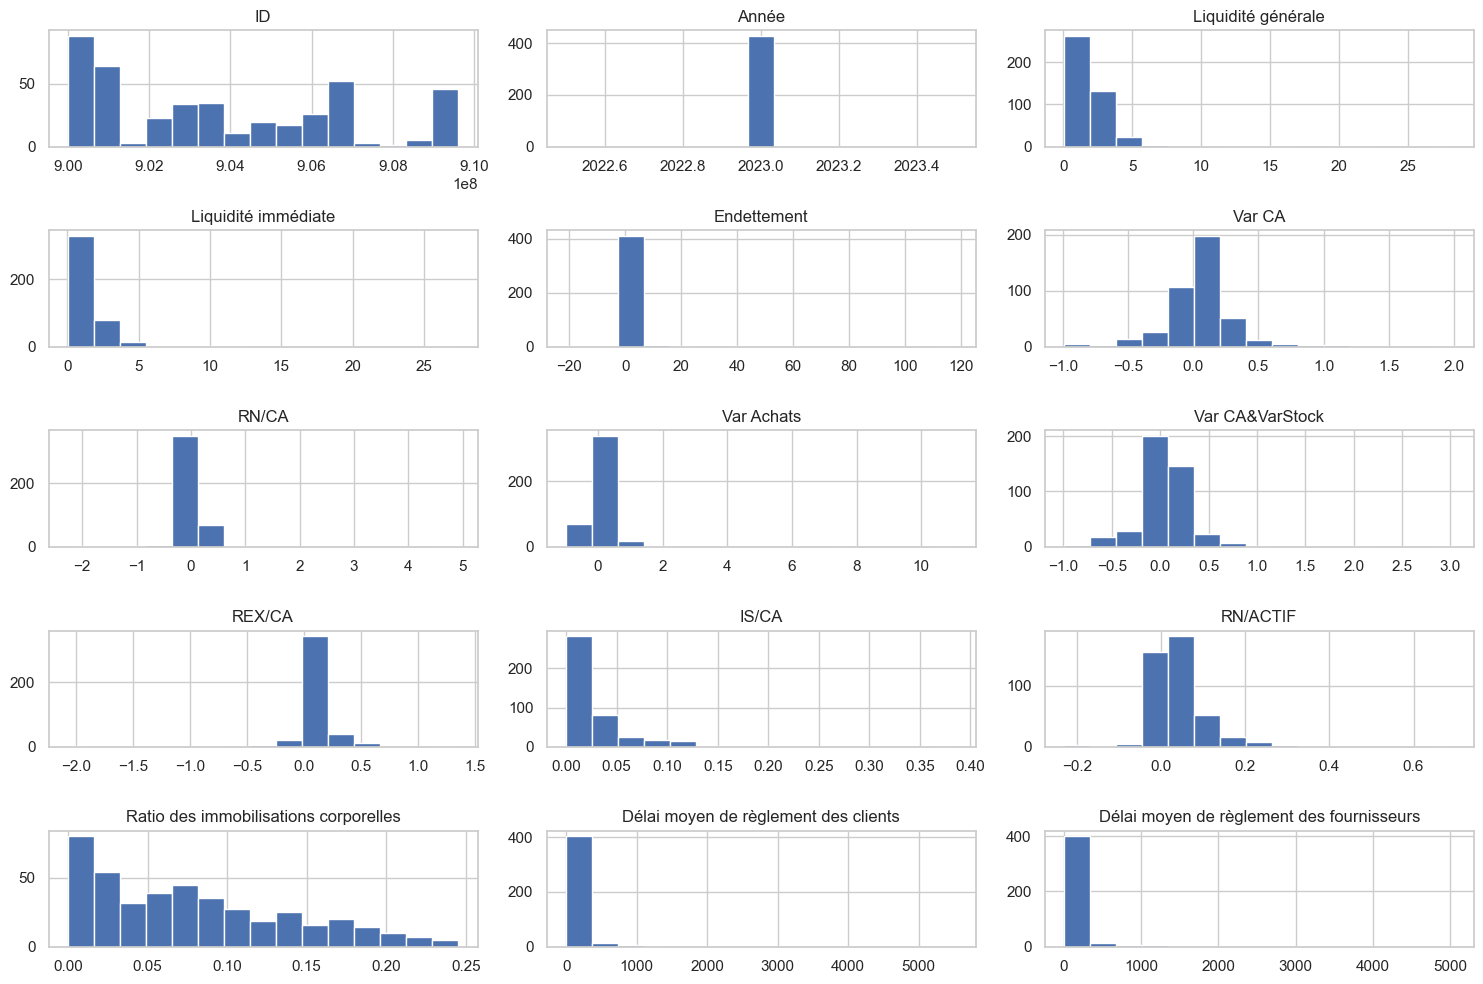


Count plots for categorical columns:


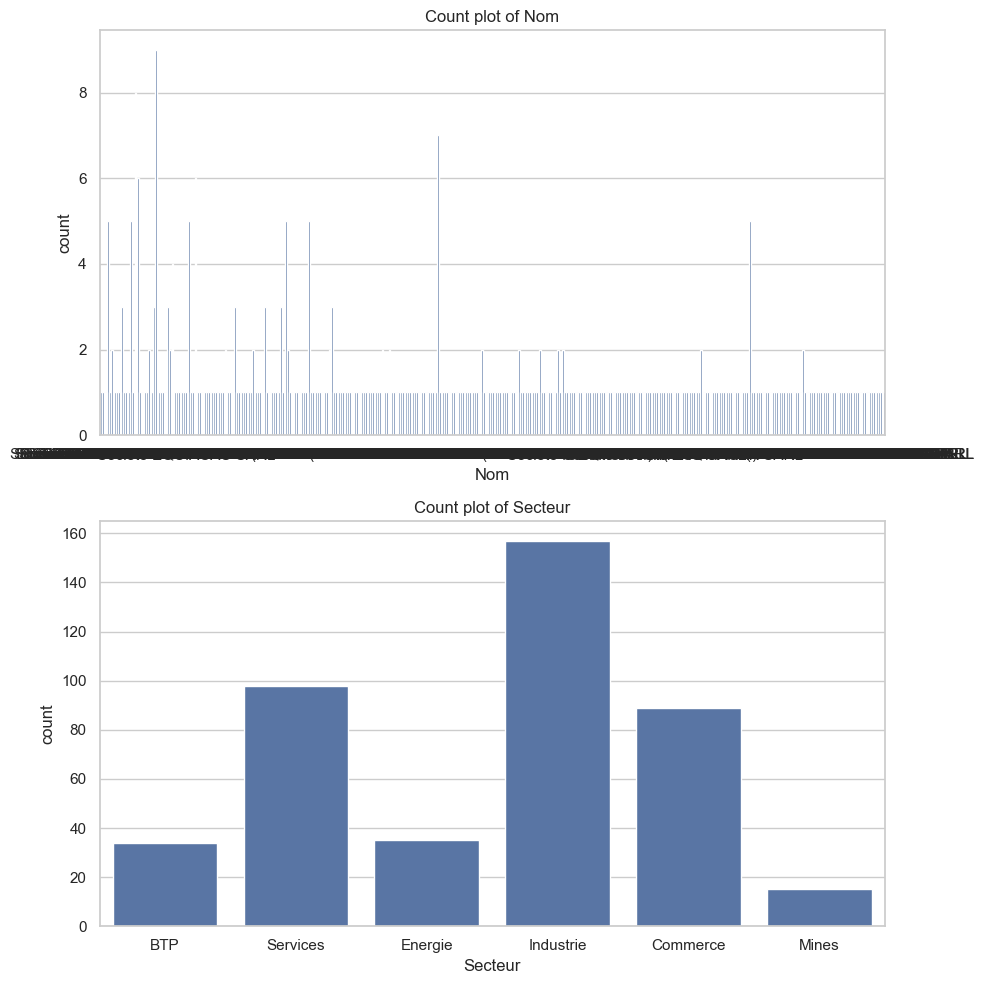

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Function to plot histograms for numerical columns
def plot_histograms(df, columns):
    df[columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
    plt.tight_layout()
    plt.show()

# Function to plot count plots for categorical columns
def plot_count_plots(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5 * len(columns)))
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Count plot of {column}')
    plt.tight_layout()
    plt.show()

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numerical columns
print("Histograms for numerical columns:")
plot_histograms(data, numerical_columns)

# Plot count plots for categorical columns
print("\nCount plots for categorical columns:")
plot_count_plots(data, categorical_columns)

In [5]:
# One-hot encode 'Secteur' and 'Nom' columns
data_encoded = pd.get_dummies(data, columns=['Secteur'])

# Display the first few rows of the encoded dataframe
print("First few rows of the encoded dataframe:")
print(data_encoded.head())

First few rows of the encoded dataframe:
          ID                    Nom  Année  Liquidité générale  \
0  906416441  Société ESDAACAS SARL   2023                6.49   
1  900216421  Société MOTIACAU SARL   2023                3.98   
2  905016401  Société INGCACAD SARL   2023                1.21   
3  900306430  Société AINEACAE SARL   2023                0.31   
4  906406440  Société ASTEACAM SARL   2023                1.34   

   Liquidité immédiate  Endettement  Var CA  RN/CA  Var Achats  \
0                 3.68         0.62  -0.469 -0.307      7.5001   
1                 1.49         0.32   2.003  0.017      1.9293   
2                 1.21         0.00   1.042  0.184      1.1168   
3                 0.13         0.00   0.948  0.005      0.9469   
4                 1.23         0.45   0.641  0.028      1.1684   

   Var CA&VarStock  ...  RN/ACTIF  Ratio des immobilisations corporelles  \
0           3.0405  ...    -0.012                                 0.0012   
1           2

In [6]:
data_encoded = data_encoded.drop(columns=['Année','Nom'])

In [7]:
# Ensure numerical_columns is defined
numerical_columns.remove('Année')
print("Updated numerical columns:")
print(numerical_columns)

Updated numerical columns:
['ID', 'Liquidité générale', 'Liquidité immédiate', 'Endettement', 'Var CA', 'RN/CA', 'Var Achats', 'Var CA&VarStock', 'REX/CA', 'IS/CA', 'RN/ACTIF', 'Ratio des immobilisations corporelles', 'Délai moyen de règlement des clients', 'Délai moyen de règlement des fournisseurs']


Box plots for numerical columns:


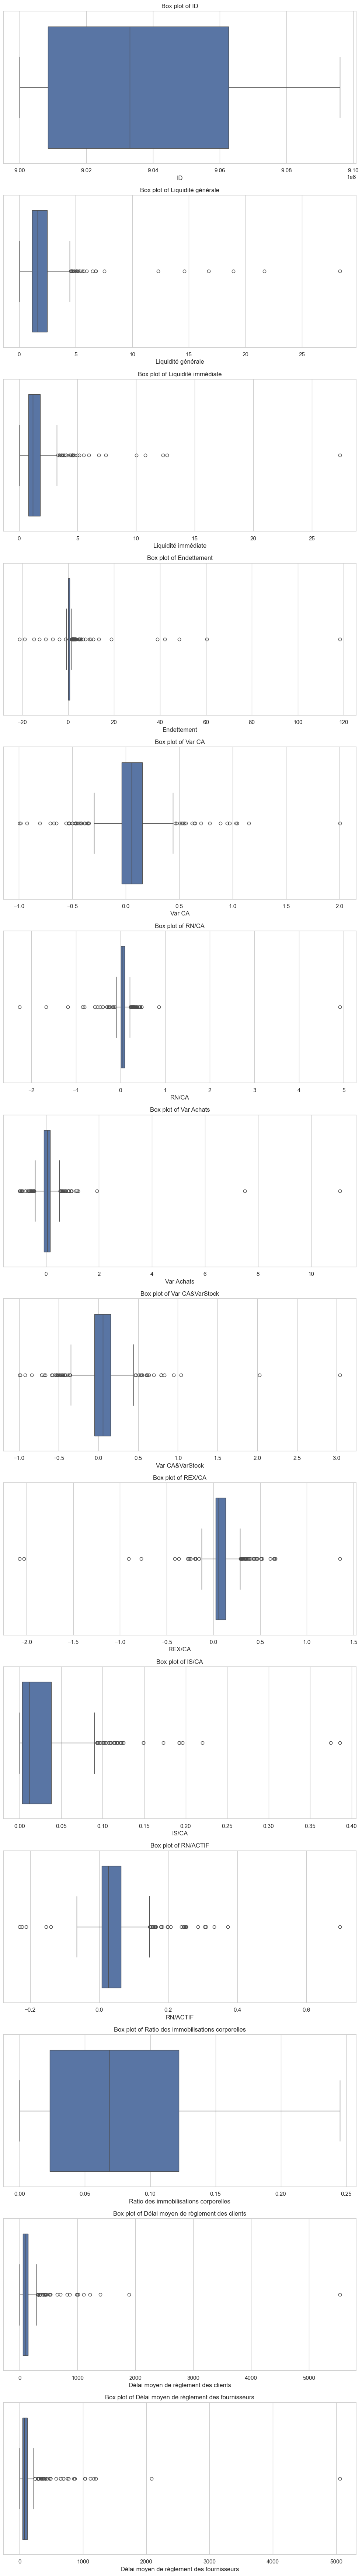

In [6]:
# Function to plot box plots for numerical columns
def plot_box_plots(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5 * len(columns)))
    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box plot of {column}')
    plt.tight_layout()
    plt.show()

# Plot box plots for numerical columns
print("Box plots for numerical columns:")
plot_box_plots(data_encoded, numerical_columns)

In [8]:
def count_outliers(df, columns):
    outliers_count = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = outliers.shape[0]
    return outliers_count


In [12]:

outliers_count = count_outliers(data_encoded, numerical_columns)
print("Number of outliers in each numerical column:")
print(outliers_count)

Number of outliers in each numerical column:
{'ID': 0, 'Liquidité générale': 9, 'Liquidité immédiate': 12, 'Endettement': 0, 'Var CA': 36, 'RN/CA': 34, 'Var Achats': 29, 'Var CA&VarStock': 33, 'REX/CA': 24, 'IS/CA': 20, 'RN/ACTIF': 24, 'Ratio des immobilisations corporelles': 0, 'Délai moyen de règlement des clients': 0, 'Délai moyen de règlement des fournisseurs': 0}


In [10]:
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df


In [11]:

data_encoded = replace_outliers_with_mean(data_encoded, numerical_columns)

In [13]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = data_encoded[numerical_columns].corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                                                 ID  Liquidité générale  \
ID                                         1.000000            0.050995   
Liquidité générale                         0.050995            1.000000   
Liquidité immédiate                        0.058552            0.796002   
Endettement                               -0.005500            0.012059   
Var CA                                    -0.009254           -0.061230   
RN/CA                                      0.036745            0.119871   
Var Achats                                -0.033536           -0.140616   
Var CA&VarStock                           -0.043383           -0.066471   
REX/CA                                     0.029235            0.152770   
IS/CA                                      0.006410            0.066266   
RN/ACTIF                                   0.029835            0.106900   
Ratio des immobilisations corporelles      0.103646           -0.163618   
Délai

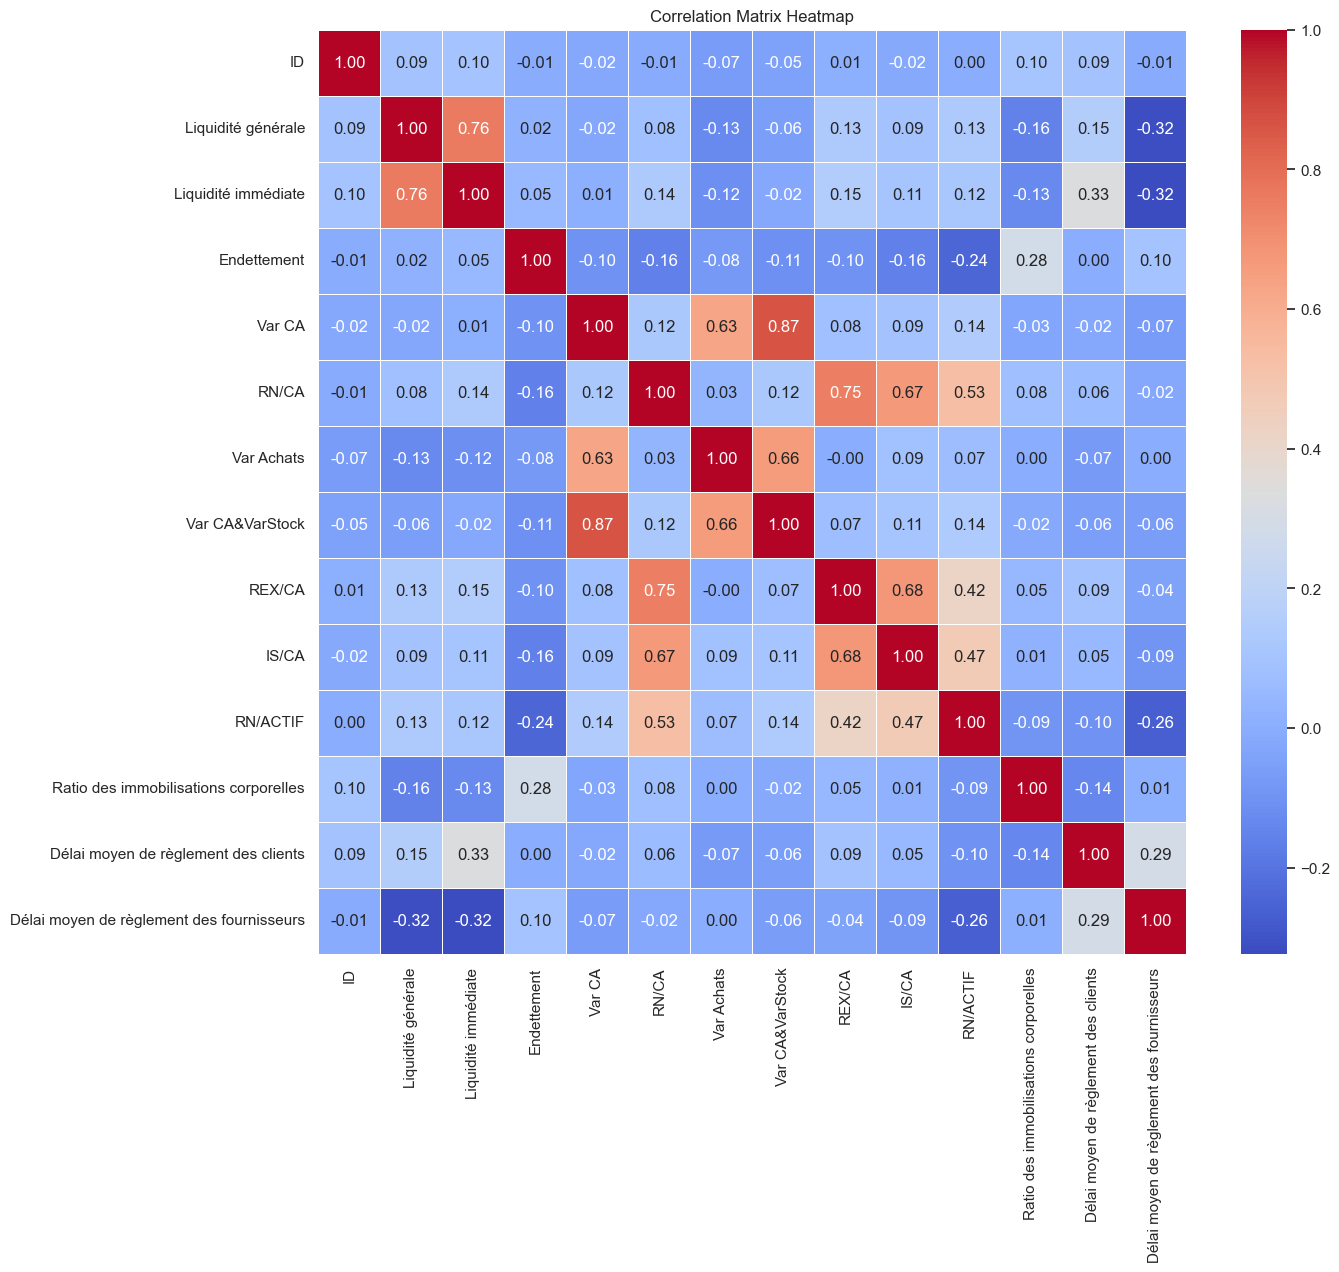

In [15]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
import numpy as np
# Extract the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the index of feature columns with correlation greater than 0.8
high_correlation = upper_triangle[upper_triangle > 0.5].stack().reset_index()
high_correlation.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove rows where 'Feature1' or 'Feature2' is 'ID'
high_correlation = high_correlation[(high_correlation['Feature1'] != 'ID') & (high_correlation['Feature2'] != 'ID')]

print("Most correlated variables (excluding 'ID' and identical columns):")
print(high_correlation)

Most correlated variables (excluding 'ID' and identical columns):
             Feature1             Feature2  Correlation
0  Liquidité générale  Liquidité immédiate     0.796002
1              Var CA           Var Achats     0.649117
2              Var CA      Var CA&VarStock     0.894338
3               RN/CA               REX/CA     0.696475
4               RN/CA                IS/CA     0.589955
5               RN/CA             RN/ACTIF     0.554962
6          Var Achats      Var CA&VarStock     0.677170
7              REX/CA                IS/CA     0.668899


In [18]:
# Initialize a set to keep track of columns to retain
columns_to_keep = set()

# Iterate through the pairs of highly correlated variables
for _, row in high_correlation.iterrows():
    feature1, feature2 = row['Feature1'], row['Feature2']
    # If neither feature is already in the set, add both
    if feature1 not in columns_to_keep and feature2 not in columns_to_keep:
        columns_to_keep.add(feature2)
    # If one of the features is already in the set, add the other
    elif feature1 in columns_to_keep:
        columns_to_keep.add(feature2)
    elif feature2 in columns_to_keep:
        columns_to_keep.add(feature1)


In [19]:

# Create a new dataframe with the retained columns
data_encoded_reduced_multilinearity = data_encoded[list(columns_to_keep)]

# Print the columns kept
print("Columns kept:")
print(data_encoded_reduced_multilinearity.columns.tolist())

Columns kept:
['IS/CA', 'Var CA&VarStock', 'RN/ACTIF', 'Liquidité immédiate', 'Var Achats', 'REX/CA']


## Kmeans Function

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    silhouette_score, 
    calinski_harabasz_score, 
    davies_bouldin_score
)

def perform_kmeans_pca_clustering(
    data, 
    variable_name, 
    n_clusters_range=(2, 7),  # Range of clusters to test
    random_state=42, 
    plot_title=None,
    verbose=True
):
    """
    Perform advanced K-means clustering with PCA and hyperparameter tuning
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Input dataframe
    variable_name : str
        Name of the column to exclude from PCA and use for visualization
    n_clusters_range : tuple, optional
        Range of clusters to test (min, max)
    random_state : int, optional
        Random state for reproducibility
    plot_title : str, optional
        Custom plot title
    verbose : bool, optional
        Print detailed information
    
    Returns:
    --------
    Dictionary with clustering results and performance metrics
    """
    # Create a copy to avoid modifying the original dataframe
    data_for_processing = data.copy()
    
    # Separate the specified variable
    variable_column = data_for_processing[variable_name].values.reshape(-1, 1)
    
    # Remove specified variable from the dataset for PCA
    features_for_pca = data_for_processing.drop(columns=[variable_name])
    
    # Scale the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_for_pca)
    
    # Perform PCA with n_components=1
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(features_scaled)
    
    # Scale the specified variable
    variable_scaled = StandardScaler().fit_transform(variable_column)
    
    # Combine PCA result with specified variable
    combined_features = np.column_stack((variable_scaled, pca_result))
    
    # Hyperparameter Tuning
    performance_metrics = []
    
    # Test different numbers of clusters
    for n_clusters in range(n_clusters_range[0], n_clusters_range[1]):
        # K-means with multiple initializations
        kmeans = KMeans(
            n_clusters=n_clusters, 
            n_init=10,  # Multiple initializations
            random_state=random_state
        )
        cluster_labels = kmeans.fit_predict(combined_features)
        
        # Calculate performance metrics
        try:
            silhouette = silhouette_score(combined_features, cluster_labels)
            calinski = calinski_harabasz_score(combined_features, cluster_labels)
            davies = davies_bouldin_score(combined_features, cluster_labels)
            
            performance_metrics.append({
                'n_clusters': n_clusters,
                'silhouette_score': silhouette,
                'calinski_harabasz_score': calinski,
                'davies_bouldin_score': davies
            })
            
            if verbose:
                print(f"Clusters: {n_clusters}")
                print(f"Silhouette Score: {silhouette:.4f}")
                print(f"Calinski-Harabasz Score: {calinski:.4f}")
                print(f"Davies-Bouldin Score: {davies:.4f}\n")
        
        except Exception as e:
            print(f"Error calculating metrics for {n_clusters} clusters: {e}")
    
    # Select best number of clusters based on highest silhouette score
    performance_df = pd.DataFrame(performance_metrics)
    best_clusters = performance_df.loc[performance_df['silhouette_score'].idxmax(), 'n_clusters']
    
    if verbose:
        print(f"Best number of clusters: {best_clusters}")
        print("Performance DataFrame:")
        print(performance_df)
    
    # Final clustering with best number of clusters
    final_kmeans = KMeans(
        n_clusters=best_clusters, 
        n_init=10, 
        random_state=random_state
    )
    final_labels = final_kmeans.fit_predict(combined_features)
    
    # Create DataFrame for visualization
    clustered_data = pd.DataFrame(data=pca_result, columns=['PCA1'])
    clustered_data['ID'] = data_for_processing.index
    clustered_data[variable_name] = variable_scaled
    clustered_data['Cluster'] = final_labels
    
    # Add original secteur if it exists
    if 'Secteur' in data_for_processing.columns:
        clustered_data['Secteur'] = data_for_processing['Secteur']
    
    # Visualize
    fig = px.scatter(
        clustered_data, 
        x=variable_name, 
        y='PCA1', 
        color='Cluster', 
        symbol='Secteur' if 'Secteur' in clustered_data.columns else None,
        title=plot_title or f'K-means Clustering with {variable_name} and Single PCA Component'
    )
    fig.show()
    
    # Print most contributing features to PCA
    print("Most Contributing Features to PCA:")
    feature_names = features_for_pca.columns
    feature_contributions = np.abs(pca.components_[0])
    top_features = sorted(
        zip(feature_names, feature_contributions), 
        key=lambda x: x[1], 
        reverse=True
    )[:5]  # Top 5 contributing features
    
    for feature, contribution in top_features:
        print(f"{feature}: {contribution}")
    
    print(f"\nExplained Variance Ratio: {pca.explained_variance_ratio_[0]}")
    
    # Print cluster summary
    cluster_summary = clustered_data.groupby('Cluster').agg({
        'PCA1': ['mean', 'std'],
        variable_name: ['mean', 'std'],
        **(
            {'Secteur': lambda x: x.value_counts().index[0]} 
            if 'Secteur' in clustered_data.columns 
            else {}
        )
    })
    print("\nCluster Summary:")
    print(cluster_summary)
    
    return {
        'clustered_data': clustered_data,
        'kmeans_model': final_kmeans,
        'pca_model': pca,
        'figure': fig,
        'performance_metrics': performance_df,
        'best_clusters': best_clusters
    }


In [26]:
result = perform_kmeans_pca_clustering(
    data_encoded_reduced_multilinearity, 
    variable_name='Var CA&VarStock',
    n_clusters_range=(3, 4)
)

Clusters: 3
Silhouette Score: 0.3341
Calinski-Harabasz Score: 307.0816
Davies-Bouldin Score: 0.9813

Best number of clusters: 3
Performance DataFrame:
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           3          0.334055               307.081619              0.981342


Most Contributing Features to PCA:
REX/CA: 0.6071972738388145
IS/CA: 0.5815408886526136
RN/ACTIF: 0.5018775289671953
Liquidité immédiate: 0.2008171828081564
Var Achats: 0.030217056021689864

Explained Variance Ratio: 0.41643914258100884

Cluster Summary:
             PCA1           Var CA&VarStock          
             mean       std            mean       std
Cluster                                              
0       -0.524706  0.669200        1.030114  0.727031
1        1.673860  0.962048        0.028724  0.944218
2       -1.005030  0.732461       -0.561811  0.683902


## pca1 pca2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded_reduced_multilinearity)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# DBSCAN Clustering
# Tune these parameters based on your data
#dbscan = DBSCAN(eps=0.5, min_samples=5)
#dbscan_labels = dbscan.fit_predict(data_scaled)

# Create DataFrames for visualization
pca_df_kmeans = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df_kmeans['Cluster'] = kmeans_labels
pca_df_kmeans['Secteur'] = data['Secteur']

#pca_df_dbscan = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
#pca_df_dbscan['Cluster'] = dbscan_labels
#pca_df_dbscan['Secteur'] = data['Secteur']

# Plotly visualizations
fig_kmeans = px.scatter(pca_df_kmeans, x='PCA1', y='PCA2', color='Cluster', symbol='Secteur', 
                        title='K-means Clustering Results')
fig_kmeans.show()

#fig_dbscan = px.scatter(pca_df_dbscan, x='PCA1', y='PCA2', color='Cluster', symbol='Secteur', 
#                        title='DBSCAN Clustering Results')
#fig_dbscan.show()

c:\Users\exe\Documents\Python Scripts\analyse financiere\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\exe\Documents\Python Scripts\analyse financiere\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Scoring clusters

In [27]:
import pandas as pd

# Define the scoring function
def calculate_risk_score(row):
    score = 0
    
    # Liquidité Générale
    if row['Liquidité générale'] < 0.9:
        score += 2
    elif 0.9 <= row['Liquidité générale'] < 1.2:
        score += 1
    
    # Liquidité Immédiate
    if row['Liquidité immédiate'] < 0.5:
        score += 2
    elif 0.5 <= row['Liquidité immédiate'] < 0.7:
        score += 1
    
    # Endettement Global
    if row['Endettement'] > 0.9:
        score += 2
    elif 0.7 <= row['Endettement'] <= 0.9:
        score += 1
    
    # RN/CA (Rentabilité nette)
    if row['RN/CA'] < 0.02:
        score += 2
    elif 0.02 <= row['RN/CA'] < 0.05:
        score += 1
    
    # REX/CA (Rentabilité d’exploitation)
    if row['REX/CA'] < 0.05:
        score += 2
    elif 0.05 <= row['REX/CA'] < 0.1:
        score += 1
    
    # Variation du CA
    if abs(row['Var CA']) > 0.5:
        score += 2
    elif 0.3 < abs(row['Var CA']) <= 0.5:
        score += 1
    
    # Variation des Achats
    if abs(row['Var Achats']) > 0.7:
        score += 2
    elif 0.5 < abs(row['Var Achats']) <= 0.7:
        score += 1
    
    # Var CA & Var Stock
    if abs(row['Var CA&VarStock']) > 0.5:
        score += 2
    elif 0.3 < abs(row['Var CA&VarStock']) <= 0.5:
        score += 1
    
    # RN/ACTIF (Rentabilité nette des actifs)
    if row['RN/ACTIF'] < 0.02:
        score += 2
    elif 0.02 <= row['RN/ACTIF'] < 0.05:
        score += 1
    
    # Ratio Immobilisations/Actifs
    if row['Ratio des immobilisations corporelles'] < 0.2:
        score += 2
    elif 0.2 <= row['Ratio des immobilisations corporelles'] < 0.3:
        score += 1
    
    # Délai moyen règlement des clients
    if row['Délai moyen de règlement des clients'] > 200:
        score += 2
    elif 180 < row['Délai moyen de règlement des clients'] <= 200:
        score += 1
    
    # Délai moyen règlement fournisseurs
    if row['Délai moyen de règlement des fournisseurs'] > 150:
        score += 2
    elif 120 < row['Délai moyen de règlement des fournisseurs'] <= 150:
        score += 1
    
    return score

# Apply the scoring function to the dataframe
data['Risk Score'] = data.apply(calculate_risk_score, axis=1)

# Define the thresholds for clustering
low_threshold = data['Risk Score'].quantile(0.33)
high_threshold = data['Risk Score'].quantile(0.66)

# Cluster into three groups
def risk_cluster(score):
    if score <= low_threshold:
        return 'Low Risk'
    elif score <= high_threshold:
        return 'Moderate Risk'
    else:
        return 'High Risk'

data['Risk Cluster'] = data['Risk Score'].apply(risk_cluster)

print("Data with risk clusters:")
print(data[['ID', 'Risk Score', 'Risk Cluster']])

Data with risk clusters:
            ID  Risk Score   Risk Cluster
0    906416441          17      High Risk
1    900216421          18      High Risk
2    905016401           8  Moderate Risk
3    900306430          17      High Risk
4    906406440          16      High Risk
..         ...         ...            ...
423  905226422          15      High Risk
424  905226422          21      High Risk
425  900846484          18      High Risk
426  906806480          16      High Risk
427  908766476          18      High Risk

[428 rows x 3 columns]


In [32]:
import plotly.express as px

# Create a copy of the clustered data
clustered_data_with_risk = result['clustered_data'].copy()

# Add the Risk Cluster to the copy
clustered_data_with_risk['Risk Cluster'] = data['Risk Cluster'].values

# Visualize the new plot with Plotly scatterplot
fig = px.scatter(
    clustered_data_with_risk, 
    x='Var CA&VarStock', 
    y='PCA1', 
    color='Cluster', 
    symbol='Risk Cluster', 
    title='K-means Clustering with Risk Cluster Labels'
)
fig.show()

In [33]:
from sklearn.metrics import accuracy_score

# Map Risk Cluster to ordinal values
risk_cluster_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
clustered_data_with_risk['Risk Cluster Ordinal'] = clustered_data_with_risk['Risk Cluster'].map(risk_cluster_mapping)

# Map KMeans clusters to ordinal values
kmeans_cluster_mapping = {1: 0, 0: 1, 2: 2}
clustered_data_with_risk['Cluster Ordinal'] = clustered_data_with_risk['Cluster'].map(kmeans_cluster_mapping)

# Calculate accuracy
accuracy = accuracy_score(clustered_data_with_risk['Risk Cluster Ordinal'], clustered_data_with_risk['Cluster Ordinal'])
print(f"Accuracy between KMeans clusters and Risk Clusters: {accuracy:.4f}")

Accuracy between KMeans clusters and Risk Clusters: 0.5911


In [34]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each Risk Cluster
risk_clusters = clustered_data_with_risk['Risk Cluster'].unique()
accuracy_per_cluster = {}

for cluster in risk_clusters:
    cluster_data = clustered_data_with_risk[clustered_data_with_risk['Risk Cluster'] == cluster]
    accuracy = accuracy_score(cluster_data['Risk Cluster Ordinal'], cluster_data['Cluster Ordinal'])
    accuracy_per_cluster[cluster] = accuracy

print("Accuracy for each Risk Cluster:")
for cluster, acc in accuracy_per_cluster.items():
    print(f"{cluster}: {acc:.4f}")

Accuracy for each Risk Cluster:
High Risk: 0.6879
Moderate Risk: 0.3248
Low Risk: 0.6941


In [36]:
features = ['IS/CA', 'Var CA&VarStock', 'RN/ACTIF', 'Liquidité immédiate', 'Var Achats', 'REX/CA']
best_feature = None
best_accuracy = 0

for feature in features:
    result = perform_kmeans_pca_clustering(
        data_encoded_reduced_multilinearity, 
        variable_name=feature,
        n_clusters_range=(3, 4),
        verbose=False
    )
    
    clustered_data_with_risk = result['clustered_data'].copy()
    clustered_data_with_risk['Risk Cluster'] = data['Risk Cluster'].values
    
    # Map Risk Cluster to ordinal values
    clustered_data_with_risk['Risk Cluster Ordinal'] = clustered_data_with_risk['Risk Cluster'].map(risk_cluster_mapping)
    
    # Map KMeans clusters to ordinal values
    clustered_data_with_risk['Cluster Ordinal'] = clustered_data_with_risk['Cluster'].map(kmeans_cluster_mapping)
    
    # Calculate accuracy
    accuracy = accuracy_score(clustered_data_with_risk['Risk Cluster Ordinal'], clustered_data_with_risk['Cluster Ordinal'])
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature

print(f"Best feature: {best_feature}")
print(f"Highest accuracy: {best_accuracy:.4f}")

Most Contributing Features to PCA:
Var CA&VarStock: 0.6471463544504642
Var Achats: 0.6225075936406514
RN/ACTIF: 0.3519713908138715
REX/CA: 0.26355961908283015
Liquidité immédiate: 0.018394537739829603

Explained Variance Ratio: 0.3513096550821823

Cluster Summary:
             PCA1               IS/CA          
             mean       std      mean       std
Cluster                                        
0        1.122486  0.998696  1.613357  0.804215
1       -1.155776  0.779053 -0.379409  0.704308
2        0.814877  0.806955 -0.324199  0.504206


Most Contributing Features to PCA:
REX/CA: 0.6071972738388145
IS/CA: 0.5815408886526136
RN/ACTIF: 0.5018775289671953
Liquidité immédiate: 0.2008171828081564
Var Achats: 0.030217056021689864

Explained Variance Ratio: 0.41643914258100884

Cluster Summary:
             PCA1           Var CA&VarStock          
             mean       std            mean       std
Cluster                                              
0       -0.524706  0.669200        1.030114  0.727031
1        1.673860  0.962048        0.028724  0.944218
2       -1.005030  0.732461       -0.561811  0.683902


Most Contributing Features to PCA:
REX/CA: 0.5997779001722006
IS/CA: 0.5858949213741562
Var CA&VarStock: 0.39087071796365835
Var Achats: 0.3534677732238339
Liquidité immédiate: 0.1388316487828149

Explained Variance Ratio: 0.34754456323294547

Cluster Summary:
             PCA1            RN/ACTIF          
             mean       std      mean       std
Cluster                                        
0        0.112582  0.572346  0.083115  0.761163
1       -1.271838  0.544370 -0.739279  0.553312
2        1.861085  0.900349  1.046248  0.999790


Most Contributing Features to PCA:
REX/CA: 0.5753952085142191
IS/CA: 0.5578962985112136
RN/ACTIF: 0.5051380050816326
Var CA&VarStock: 0.2420547579110066
Var Achats: 0.20956422433506589

Explained Variance Ratio: 0.415932272805414

Cluster Summary:
             PCA1           Liquidité immédiate          
             mean       std                mean       std
Cluster                                                  
0       -0.772404  0.825655           -0.715877  0.495722
1        1.695387  0.945233            0.180138  0.918756
2       -0.820314  0.817760            1.041621  0.721696


Most Contributing Features to PCA:
REX/CA: 0.6040924845134179
IS/CA: 0.5743132184095466
RN/ACTIF: 0.5035361553218485
Liquidité immédiate: 0.20013044558756055
Var CA&VarStock: 0.10786909820282231

Explained Variance Ratio: 0.4188041567441978

Cluster Summary:
             PCA1           Var Achats          
             mean       std       mean       std
Cluster                                         
0       -1.248938  0.696244  -0.715445  0.777504
1        1.745849  0.943966  -0.047815  0.974947
2       -0.424576  0.625061   0.652153  0.727167


Most Contributing Features to PCA:
Var Achats: 0.6572134060838846
Var CA&VarStock: 0.6568348650141872
RN/ACTIF: 0.30063132344999943
IS/CA: 0.2012090663742714
Liquidité immédiate: 0.07598827498311284

Explained Variance Ratio: 0.3495216887537045

Cluster Summary:
             PCA1              REX/CA          
             mean       std      mean       std
Cluster                                        
0        1.427757  0.883712  0.844568  1.064906
1       -1.718292  0.657549 -0.285096  0.913209
2        0.029279  0.525745 -0.357354  0.649961
Best feature: Var CA&VarStock
Highest accuracy: 0.5911
